In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [55]:
states = [
    '##Virginia',
    '##Georgia',
    'Colorado',
    'Minnesota',
    'California',
    'Nevada',
    'Michigan',
    'District of Columbia',
    '##Texas',
    'Kentucky',
    'Oregon',
    'Tennessee',
    'Vermont',
    'Illinois',
    'Florida',
    'New Mexico',
    '##Mississippi',
    'Massachusetts',
    'Wisconsin',
    'Pennsylvania',
    'Kansas',
    'Missouri',
    '##Arkansas',
    'Arizona',
    '##South Carolina',
    'New York',
    'Ohio',
    'Iowa',
    '##Oklahoma',
    '##Louisiana',
    '##North Carolina',
    'Wyoming',
    '##Alabama',
    '##Washington',
    'Maine',
    'Nebraska',
    'Rhode Island',
    'Indiana',
    'Alaska',
    'District of Columbia',
    '##Tennessee',
    'South Dakota',
    'New Mexico',
    '##Oklahoma',
    'Massachusetts',
    'California',
    'Missouri',
    'Nevada',
    'Arizona',
    'Colorado',
    'Illinois',
    '##Kentucky',
    'New Jersey',
    'Connecticut',
    'Michigan',
    'New York',
    'Montana',
    'Vermont',
    'Pennsylvania',
    'Wisconsin',
    'Ohio',
    '##Florida',
    'Indiana',
    'Oregon'
    ]
southern_states =  [x.replace("##","") for x in states if x.startswith('##')]




def assign_group(tag):
    if tag == "California":
        return "California"
    if tag in southern_states:
        return "Southern States"
    else:
        return "Other States"

In [96]:
steal = pd.read_csv('2020-01-01-2021-12-31-United_States-stop-the-steal.csv')
covid = pd.read_csv('2021-01-01-2023-01-01-United_States-covid.csv')

steal['group'] = steal['admin1'].apply(assign_group)
covid['group'] = covid['admin1'].apply(assign_group)

steal['event_date'] = pd.to_datetime(steal['event_date'])
covid['event_date'] = pd.to_datetime(covid['event_date'])
steal['month_year'] = steal['event_date'].dt.to_period('M') 
covid['month_year'] = covid['event_date'].dt.to_period('M') 

In [97]:
def graph_data(data,column):
    monthly_counts = data[data['group'] != 'Other States'].groupby([column, 'group']).size().unstack(fill_value=0)

    # Step 2: Plot

    # Convert period to timestamp for plotting
    if column == 'month_year':
        monthly_counts.index = monthly_counts.index.to_timestamp()

    # Plot
    fig, ax = plt.subplots(figsize=(8, 5))

    for group in monthly_counts.columns:
        ax.plot(monthly_counts.index, monthly_counts[group], label=group, linewidth=2)

    # Format
    ax.set_xlabel("Month and Year", fontsize=12)
    ax.set_ylabel("Total Protest Activity", fontsize=12)
    ax.legend(title="Group", fontsize=10, title_fontsize=11)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()

    plt.show()

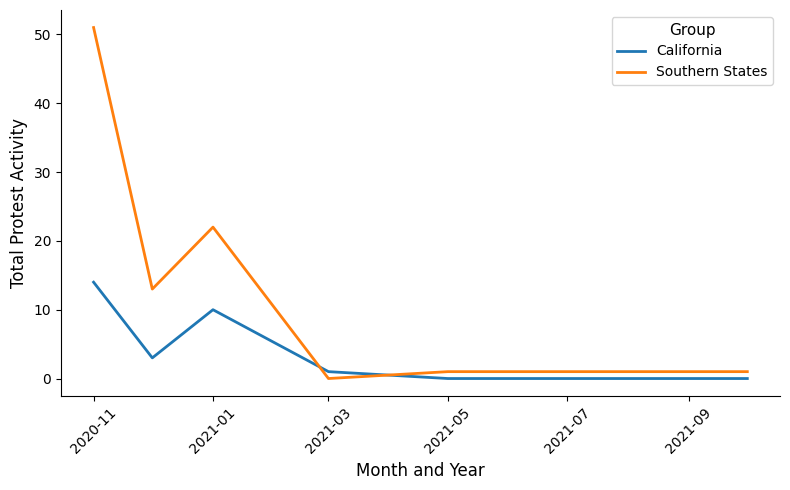

In [92]:
graph_data(steal,'month_year')

In [80]:
filter_covid

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,group,month_year
0,USA45893,2022-07-06,2022,1,Strategic developments,Strategic developments,Arrests,Police Forces of the United States (2021-2025),NaN,State forces,...,-77.0003,1,Daily Beast; Washingtonian,Subnational-National,"On 6 July 2022, Dave 'Santa' Riddell, a member...",0,NaN,1737495678,Other States,2022-07
1,USA45142,2022-06-29,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (United States),Military Forces of the United States (2021-202...,Protesters,...,-86.7842,1,Fox17 (Nashville),Subnational,"On 29 June 2022, members of the Tennessee Nati...",0,crowd size=no report,1737495677,Southern States,2022-06
2,USA39015,2022-02-07,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (United States),Native American Group (United States),Protesters,...,-103.2280,1,Rapid City Journal; NewsCenter1; KOTA Territory,Subnational,"On 7 February 2022, dozens of people, includin...",0,crowd size=no report,1644954289,Other States,2022-02
3,USA38863,2022-02-07,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (United States),Red Nation; Navajo Tribal Group (United States...,Protesters,...,-106.6511,1,Santa Fe New Mexican,Subnational,"On 7 February 2022, dozens of people, includin...",0,crowd size=dozens,1680633661,Other States,2022-02
4,USA38956,2022-02-07,2022,1,Demonstrations,Riots,Violent demonstration,Rioters (United States),AIM: American Indian Movement; Native American...,Rioters,...,-95.9928,1,2 Works for You; KOKH FOX25; KOKI Fox23 Tulsa;...,Subnational,"On 7 February 2022, at least 50 people, includ...",0,crowd size=at least 50,1737495670,Southern States,2022-02
5,USA38997,2022-02-06,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (United States),NaN,Protesters,...,-71.0639,1,Boston Globe; Boston.com,Subnational,"On 6 February 2022, about 100 people gathered ...",0,crowd size=about 100,1680633724,Other States,2022-02
6,USA38699,2022-01-31,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (United States),Latin American Group (United States); Migrants...,Protesters,...,-124.1654,1,Redheaded Blackbelt,National,"On 31 January 2022, a group of people, includi...",0,crowd size=no report,1680633888,California,2022-01
7,USA38566,2022-01-27,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (United States),GOP: Republican Party; Government of the Unite...,Protesters,...,-92.1730,1,Fox2 (St. Louis); KOLR10,Subnational,"On 27 January 2022, around 200 students, schoo...",0,crowd size=around 200,1737495670,Other States,2022-01
8,USA38974,2022-01-22,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (United States),NaN,Protesters,...,-71.0639,1,Boston Globe,Subnational,"On 22 January 2022, people gathered outside Br...",0,crowd size=no report,1680633724,Other States,2022-01
9,USA38052,2022-01-13,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (United States),NNU: National Nurses United; Health Workers (U...,Protesters,...,-115.1372,1,Channel 13 (Las Vegas); Las Vegas Review-Journal,Subnational,"On 13 January 2022, nurses and other healthcar...",0,crowd size=no report,1642541564,Other States,2022-01


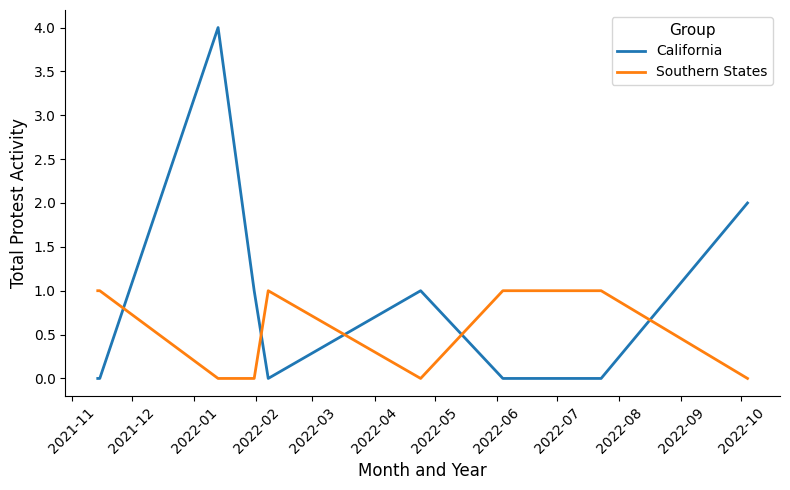

In [100]:
filter_covid = covid[covid['event_date']>='2021-09-01']
graph_data(filter_covid,column='event_date')